In [20]:
# Sets working directory to call and save files
setwd("/users/Anna/Documents/GitHub/dsc630/informatics-edu-diabetes-prediction")
# To read Excel documents
library(readxl)
#For plots
library(ggplot2)
library(tidyverse)
library(reshape2)
library(dplyr)

In [2]:
data <- read_excel("Diabetes_Classification.xlsx", sheet = 1)

New names:
* `` -> ...17
* `` -> ...18


In [3]:
# Dataframe cleaning: Remove extra end columns
data <- subset(data, select = -c(17, 18))

In [4]:
print(data)

# A tibble: 390 x 16
   `Patient number` Cholesterol Glucose `HDL Chol` `Chol/HDL ratio`   Age Gender
              <dbl>       <dbl>   <dbl>      <dbl>            <dbl> <dbl> <chr> 
 1                1         193      77         49              3.9    19 female
 2                2         146      79         41              3.6    19 female
 3                3         217      75         54              4      20 female
 4                4         226      97         70              3.2    20 female
 5                5         164      91         67              2.4    20 female
 6                6         170      69         64              2.7    20 female
 7                7         149      77         49              3      20 female
 8                8         164      71         63              2.6    20 male  
 9                9         230     112         64              3.6    20 male  
10               10         179     105         60              3      20 female
# ... w

In [21]:
# Rename columns for easier use
data <- data %>% 
  rename(
    patient_number = 'Patient number',
    HDL_chol = 'HDL Chol',
    chol_HDL = 'Chol/HDL ratio',
    sys_bp = 'Systolic BP',
    dias_bp = 'Diastolic BP',
    waisthip_ratio = 'Waist/hip ratio'
    )

In [6]:
# Count occurrences of diabetes by gender
gen_summary <- data %>%
  count(Gender, Diabetes, sort = TRUE)

In [7]:
print(gen_summary)

# A tibble: 4 x 3
  Gender Diabetes        n
  <chr>  <chr>       <int>
1 female No diabetes   194
2 male   No diabetes   136
3 female Diabetes       34
4 male   Diabetes       26


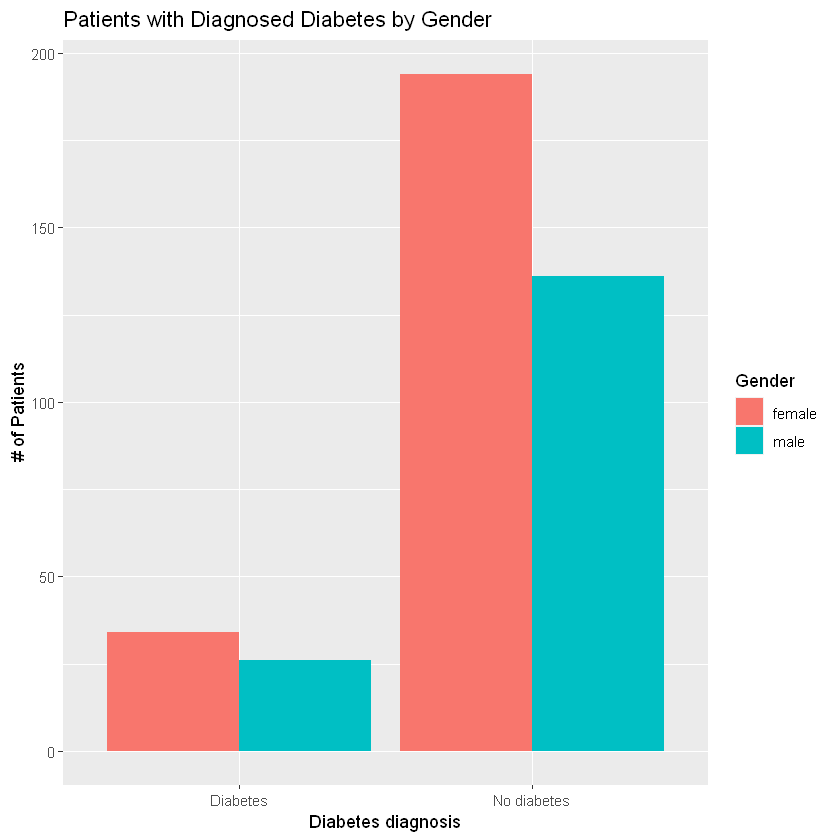

In [8]:
ggplot(gen_summary, aes(Diabetes, n, fill = Gender)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Diabetes diagnosis", y = "# of Patients", title = "Patients with Diagnosed Diabetes by Gender")

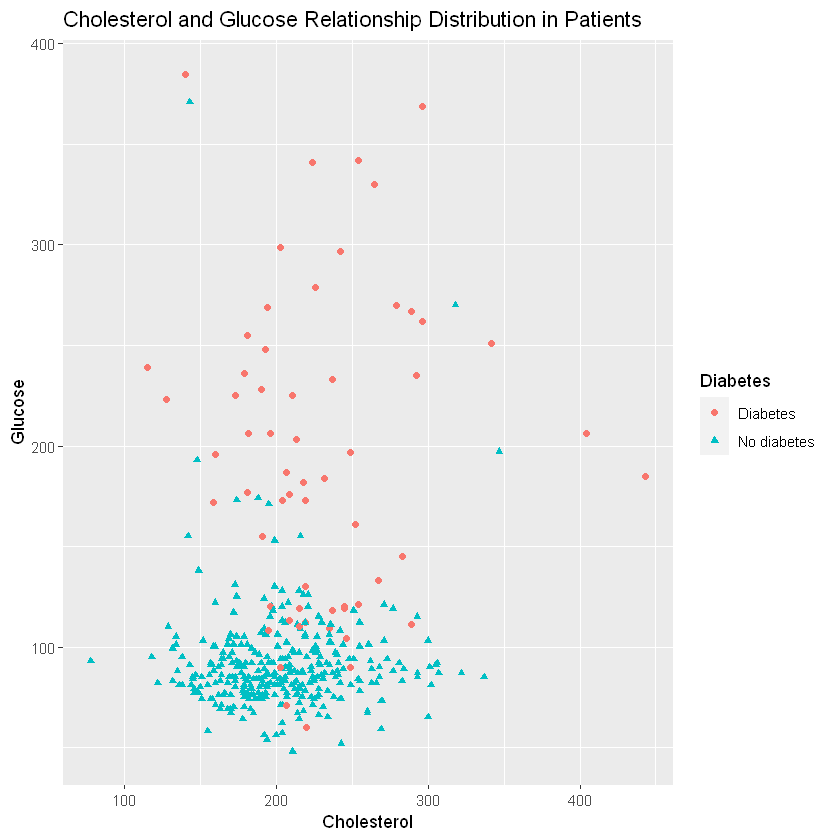

In [9]:
# Show distribution of Cholesterol and Glucose levels for diabetic vs non-diabetic
ggplot(data, aes(x=Cholesterol, y=Glucose, color=Diabetes, shape=Diabetes)) + geom_point() +
  labs(title = "Cholesterol and Glucose Relationship Distribution in Patients")

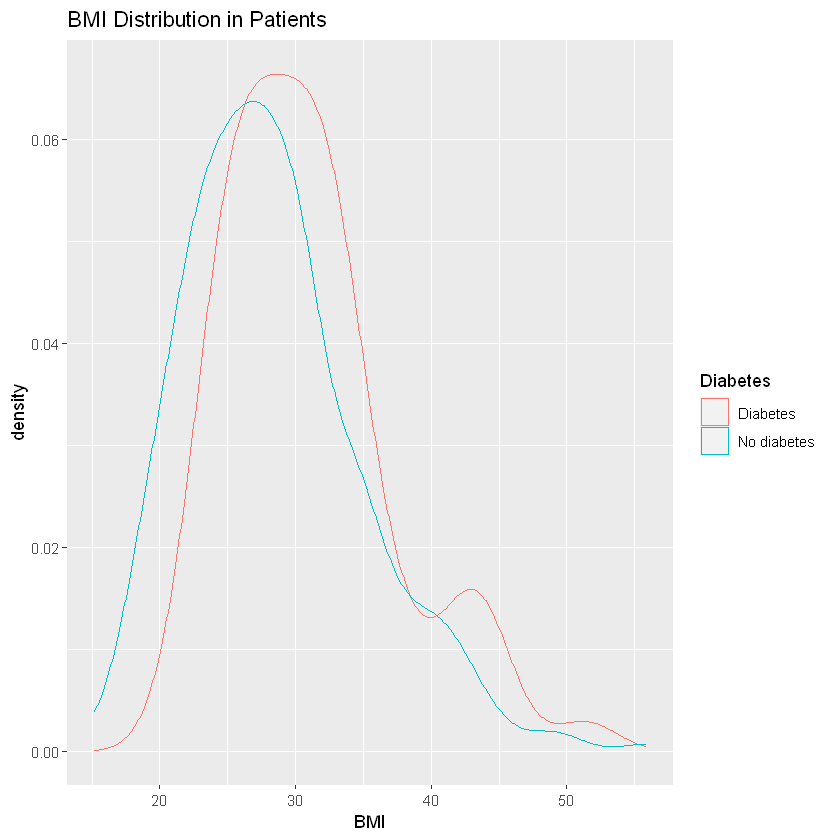

In [19]:
# Show distribution of BMI and diabetes diagnosis
ggplot(data, aes(x=BMI, color=Diabetes)) + geom_density(kernel="gaussian") +
  labs(title = "BMI Distribution in Patients")

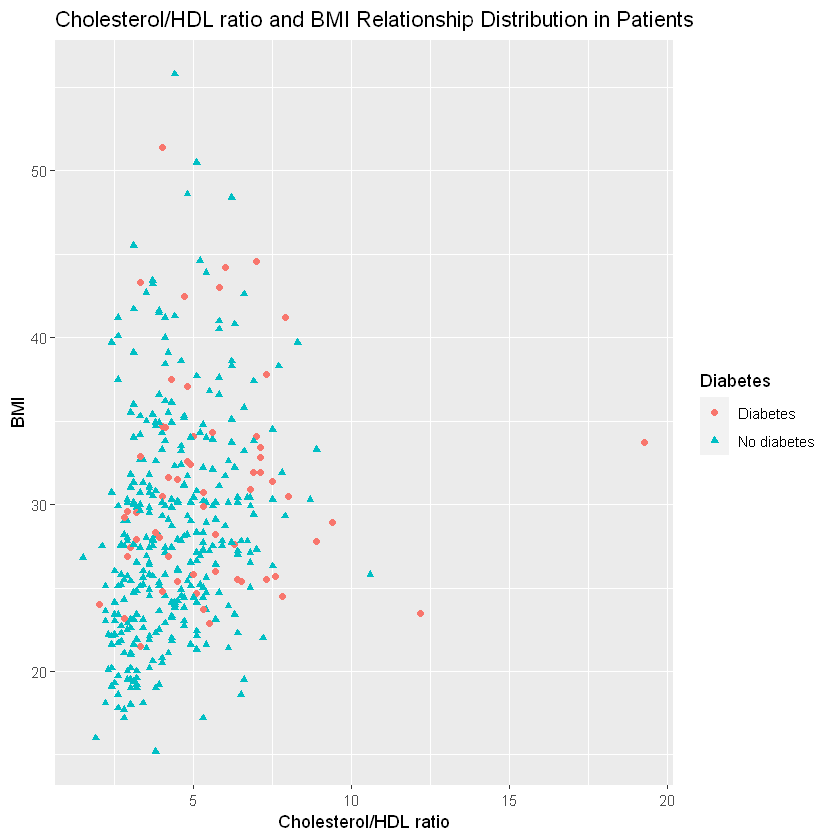

In [23]:
# BMI vs Chol/HDL ratio
ggplot(data, aes(x = chol_HDL, y = BMI, color = Diabetes, shape = Diabetes)) + geom_point() +
  labs(x="Cholesterol/HDL ratio", title = "Cholesterol/HDL ratio and BMI Relationship Distribution in Patients")